In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime

In [2]:
#data=pd.read_csv("godavari_daily.csv")
data=pd.read_excel('/home/boyking/project /Rainfall_Flood/sourceCode/data/Godavari.xlsx')
y=data['Flood']
# data.drop('Flood',axis=1,inplace=True)

In [3]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Flood, dtype: float64

In [4]:
set(y,)

{0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.6,
 1.7,
 1.8,
 1.9,
 2.1,
 2.2,
 2.4,
 2.6,
 3.0,
 3.1,
 3.8,
 4.0,
 4.2,
 4.8,
 5.4,
 5.5,
 6.0,
 6.1,
 6.5,
 6.9,
 7.0,
 7.1,
 7.3,
 7.4,
 7.9,
 8.4,
 9.4,
 9.8,
 10.0}

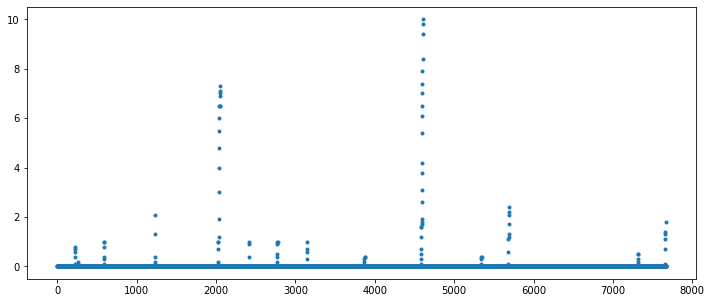

In [5]:
y.plot(x = data['Date'], y = y,style='.',figsize=(12,5))

In [6]:
print(data.shape)
data.head(6)

(7670, 6)


,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,1998-01-01,3244.0,0.0,0.91,NaN,0.0
1,1998-01-02,1591.0,0.0,0.45,NaN,0.0
2,1998-01-03,1973.0,0.0,0.55,NaN,0.0
3,1998-01-04,1973.0,0.0,0.55,NaN,0.0
4,1998-01-05,2011.0,0.0,0.56,NaN,0.0
5,1998-01-06,1642.0,0.0,0.46,NaN,0.0


In [7]:
for i in range(len(y)):
    if y.iloc[i] >= 0.5 :
        y.iloc[i]=1.0
    else :
        y.iloc[i]=0.0
data.drop('Flood',axis=1,inplace=True)

/home/boyking/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
y.value_counts()

0.0    7599
1.0      71
Name: Flood, dtype: int64

In [9]:
data.head(6)

,Date,Discharge,flood runoff,daily runoff,weekly runoff
0,1998-01-01,3244.0,0.0,0.91,NaN
1,1998-01-02,1591.0,0.0,0.45,NaN
2,1998-01-03,1973.0,0.0,0.55,NaN
3,1998-01-04,1973.0,0.0,0.55,NaN
4,1998-01-05,2011.0,0.0,0.56,NaN
5,1998-01-06,1642.0,0.0,0.46,NaN


In [10]:
d1=pd.DataFrame()
d1["Day"]=data['Date']
d1['Months']=data['Date']
d1['Year']=data['Date']


In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [12]:
d1["Year"]=data.Date.dt.year
d1["Months"]=data.Date.dt.month
d1["Day"]=data.Date.dt.day
d1.head(5)

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [13]:
type(d1['Day'][0])

numpy.int64

In [14]:
data.head()

,Date,Discharge,flood runoff,daily runoff,weekly runoff
0,1998-01-01,3244.0,0.0,0.91,NaN
1,1998-01-02,1591.0,0.0,0.45,NaN
2,1998-01-03,1973.0,0.0,0.55,NaN
3,1998-01-04,1973.0,0.0,0.55,NaN
4,1998-01-05,2011.0,0.0,0.56,NaN


In [15]:
data = data.fillna(data.mean())
data.info()
data.drop(columns='Date',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7670 non-null   datetime64[ns]
 1   Discharge      7670 non-null   float64       
 2   flood runoff   7670 non-null   float64       
 3   daily runoff   7670 non-null   float64       
 4   weekly runoff  7670 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 299.7 KB


/home/boyking/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [16]:
data.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,3244.0,0.0,0.91,7.464144
1,1591.0,0.0,0.45,7.464144
2,1973.0,0.0,0.55,7.464144
3,1973.0,0.0,0.55,7.464144
4,2011.0,0.0,0.56,7.464144


In [17]:
data=pd.concat([d1,data],axis=1)
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,3244.0,0.0,0.91,7.464144
1,2,1,1998,1591.0,0.0,0.45,7.464144
2,3,1,1998,1973.0,0.0,0.55,7.464144
3,4,1,1998,1973.0,0.0,0.55,7.464144
4,5,1,1998,2011.0,0.0,0.56,7.464144


In [18]:
scl=MinMaxScaler()
data1=scl.fit_transform(data.iloc[:,3:])
data1=scl.fit_transform(data1)

In [19]:
column=['Discharge','flood runoff','daily runoff','weekly runoff']

In [20]:
data1=pd.DataFrame(data1,columns=column)
data1.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,0.107581,0.0,0.107820,0.155503
1,0.052762,0.0,0.053318,0.155503
2,0.065431,0.0,0.065166,0.155503
3,0.065431,0.0,0.065166,0.155503
4,0.066691,0.0,0.066351,0.155503


In [21]:
data1.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,0.107581,0.0,0.107820,0.155503
1,0.052762,0.0,0.053318,0.155503
2,0.065431,0.0,0.065166,0.155503
3,0.065431,0.0,0.065166,0.155503
4,0.066691,0.0,0.066351,0.155503


In [22]:
data1.describe()

,Discharge,flood runoff,daily runoff,weekly runoff
count,7670.000000,7670.000000,7670.000000,7670.000000
mean,0.126924,0.002907,0.126465,0.155503
std,0.112001,0.039334,0.112190,0.130361
min,0.000000,0.000000,0.000000,0.000000
25%,0.052762,0.000000,0.052133,0.068542
50%,0.093404,0.000000,0.092417,0.115000
75%,0.162557,0.000000,0.162322,0.199583
max,1.000000,1.000000,1.000000,1.000000


In [23]:
data.describe()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,15.729205,6.523077,2008.000000,3827.261216,0.101752,1.067362,7.464144
std,8.800483,3.448888,6.055444,3377.267298,1.376689,0.946885,6.257307
min,1.000000,1.000000,1998.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,2003.000000,1591.000000,0.000000,0.440000,3.290000
50%,16.000000,7.000000,2008.000000,2816.500000,0.000000,0.780000,5.520000
75%,23.000000,10.000000,2013.000000,4901.750000,0.000000,1.370000,9.580000
max,31.000000,12.000000,2018.000000,30154.000000,35.000000,8.440000,48.000000


In [24]:
x=pd.DataFrame(data=data['Day'])
x['Months']=data['Months']
x['Year']=data['Year']
x.head()

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [25]:
data1=pd.concat([x,data1],axis=1)

In [26]:
data=data1
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,0.107581,0.0,0.107820,0.155503
1,2,1,1998,0.052762,0.0,0.053318,0.155503
2,3,1,1998,0.065431,0.0,0.065166,0.155503
3,4,1,1998,0.065431,0.0,0.065166,0.155503
4,5,1,1998,0.066691,0.0,0.066351,0.155503


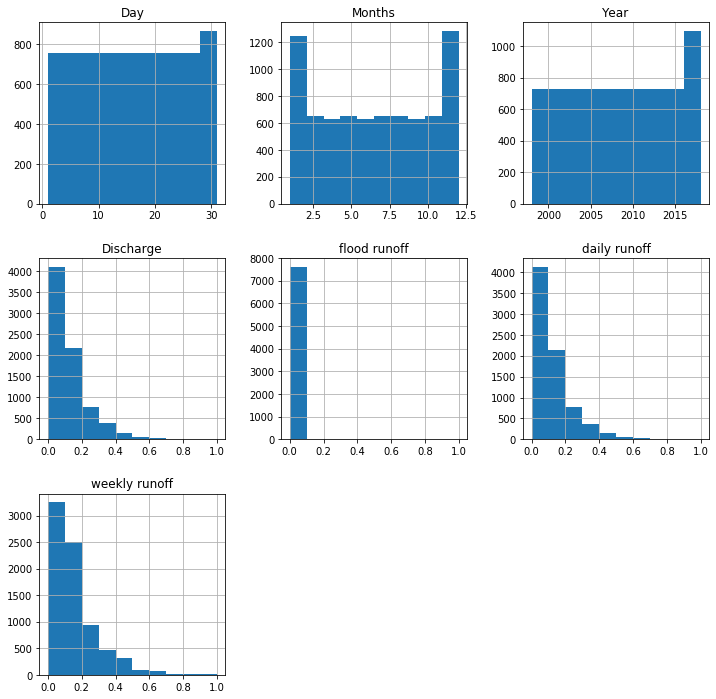

In [27]:
data.hist(linestyle='solid',figsize=(12,12));




In [28]:
print(data.columns)

Index(['Day', 'Months', 'Year', 'Discharge', 'flood runoff', 'daily runoff',
       'weekly runoff'],
      dtype='object')


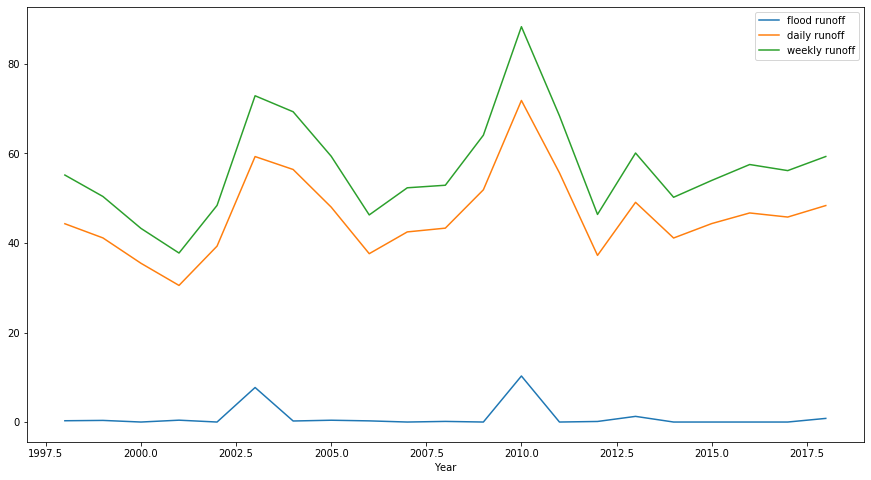

In [29]:
data[['Year', 'flood runoff', 'daily runoff', 'weekly runoff']].groupby("Year").sum().plot(figsize=(15,8));

In [30]:
locate=0;
for i in range(len(data["Day"])):
    if(data["Day"][i]==31 and data["Months"][i]==12 and data["Year"][i]==2012):
        locate=i;
        break;

i=locate+1
print(i)

x_train=data.iloc[0:i,:]
y_train=y.iloc[0:i]
x_test=data.iloc[i:,:]
y_test=y.iloc[i:]


5479


In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5479, 7)
(5479,)
(2191, 7)
(2191,)


In [32]:
y_test.value_counts()

0.0    2176
1.0      15
Name: Flood, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)
yp=reg.predict(x_test)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))


0.6256020324551246
0.43633856467607424


In [35]:
yt=np.array(y_test)
len((y_test))

2191

In [36]:
#oversampling

#!pip install imblearn

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (5369, 7)
Number transactions Y_train dataset:  (5369,)
Number transactions X_test dataset:  (2301, 7)
Number transactions Y_test dataset:  (2301,)


In [38]:
#pip install scikit-learn==0.23.

In [39]:

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 46
Before OverSampling, counts of label '0': 5323 

After OverSampling, the shape of train_X: (10646, 7)
After OverSampling, the shape of train_y: (10646,) 

After OverSampling, counts of label '1': 5323
After OverSampling, counts of label '0': 5323


In [40]:
# oversampled data 
#data_new = pd.DataFrame({'wk_runoff':X_train_res[:,2],'y':Y_train_res[:]})
#data_new.plot()

In [41]:
from sklearn.utils import shuffle
X_train_res_shuf, Y_train_res_shuf = shuffle( X_train_res, Y_train_res, random_state=0)

In [42]:
Y_test.value_counts()

0.0    2276
1.0      25
Name: Flood, dtype: int64

In [43]:
# binary classifiers
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [44]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [45]:
# Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train_res_shuf, Y_train_res_shuf, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/home/boyking/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.995961 (0.001264)
LDA: 0.988258 (0.003007)


/home/boyking/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/boyking/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.983844 (0.002004)
CART: 1.000000 (0.000000)


/home/boyking/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/boyking/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.993613 (0.001442)


/home/boyking/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.996713 (0.001585)


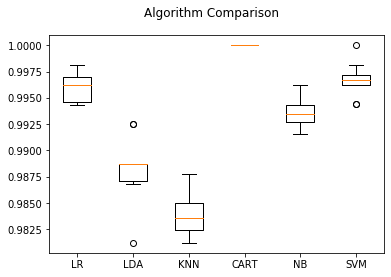

In [46]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('static/img/modelComparison/flood_models.png')
plt.show()

In [47]:
# Make predictions on validation data
knn = KNeighborsClassifier()
knn.fit(X_train_res_shuf, Y_train_res_shuf)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
cnf_matrix_tra = confusion_matrix(Y_test, predictions)
print(cnf_matrix_tra )
print(classification_report(Y_test, predictions))

0.9765319426336375
[[2225   51]
 [   3   22]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2276
         1.0       0.30      0.88      0.45        25

    accuracy                           0.98      2301
   macro avg       0.65      0.93      0.72      2301
weighted avg       0.99      0.98      0.98      2301



In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1=LinearDiscriminantAnalysis()
clf1.fit(X_train_res_shuf, Y_train_res_shuf)
predictions = clf1.predict(X_test)
# y_predict3=clf1.predict(x_test)
print(accuracy_score(Y_test, predictions))
cnf_matrix_tra = confusion_matrix(Y_test, predictions)
print(cnf_matrix_tra )
print(classification_report(Y_test, predictions))

0.979574098218166
[[2229   47]
 [   0   25]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2276
         1.0       0.35      1.00      0.52        25

    accuracy                           0.98      2301
   macro avg       0.67      0.99      0.75      2301
weighted avg       0.99      0.98      0.98      2301



In [49]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%
Confusion matrix, without normalization
[[2229   47]
 [   0   25]]


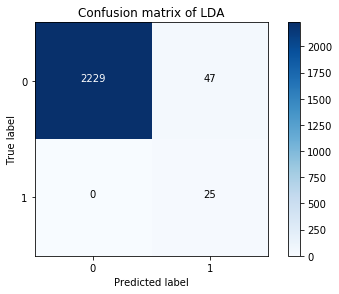

In [50]:
#cnf_matrix_tra = confusion_matrix(Y_test, predictions)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix of LDA')
plt.savefig('static/img/modelComparison/flood_confusionmatrix.png')
plt.show()